# Pick an L23 to fit

In [3]:
# imports

from importlib import reload
import numpy as np
from functools import partial

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from datetime import datetime, time
import random 
import torch

import pandas
import seaborn as sns

from oceancolor.utils import plotting 
from oceancolor.iop import cross
from oceancolor.hydrolight import loisel23

from ihop import io as ihop_io
from ihop.iops import decompose 
from ihop.iops import hybrid
from ihop.iops import io as iops_io

In [2]:
%matplotlib ipympl

# Load up

## Data

In [4]:
ds = loisel23.load_ds(4,0)

# High $a_{\rm ph}$

In [12]:
a = ds.a.data
anw = ds.anw.data
aph = ds.aph.data
adg = ds.ad.data + ds.ag.data
wave = ds.Lambda.data

In [7]:
i440 = np.argmin(np.abs(wave-440.))

In [8]:
rtio = aph[:,i440]/adg[:,i440]

In [9]:
srt_ph = np.argsort(rtio)

# Plot a quick one

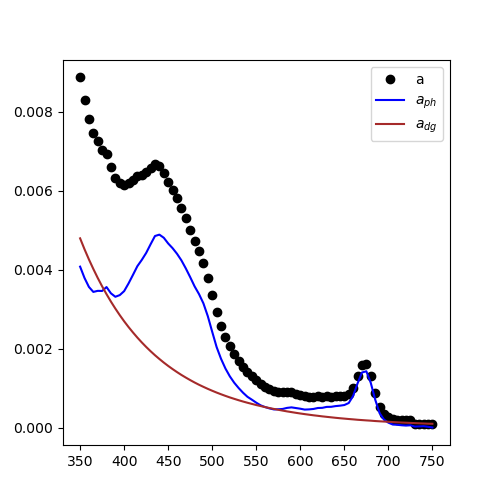

1032


In [17]:
idx = srt_ph[-20]

#
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
ax.plot(wave, anw[idx,:], 'ko', label=r'a', zorder=1)
ax.plot(wave, aph[idx,:], 'b-', label=r'$a_{ph}$', zorder=1)
ax.plot(wave, adg[idx,:], '-', color='brown', label=r'$a_{dg}$', zorder=1)
#
ax.legend()
#
plt.show()
print(idx)

# RMSE

In [20]:
rmses = []
aph440 = []
i440 = np.argmin(np.abs(wave-440.))
for idx in range(spec.shape[0]):
    recon = partial_func(wave, *d_hyb['coeff'][idx])
    diff = recon-spec[idx]
    # RMSE
    rmse = np.sqrt(np.mean(diff**2))
    # Save
    rmses.append(rmse)
    aph440.append(spec[idx][i440])

## Plot distribution

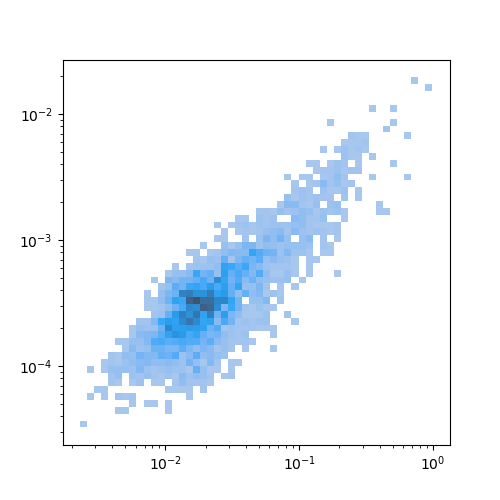

In [22]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

sns.histplot(x=aph440,y=rmses, log_scale=True)
#
plt.show()

# Highest RMSE

Worst RMSE: 2950


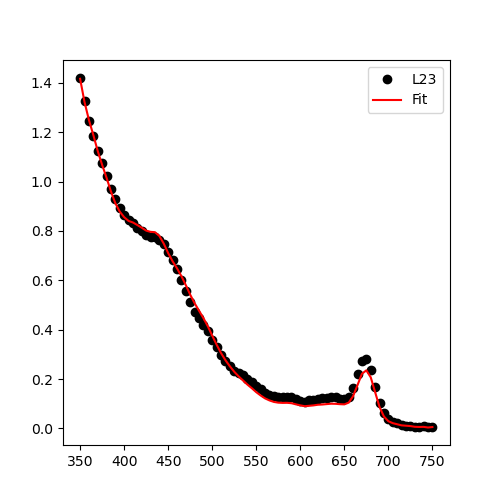

In [25]:
idx = np.argmax(rmses)
print(f"Worst RMSE: {idx}")
recon = partial_func(wave, *d_hyb['coeff'][idx])

#
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
ax.plot(wave, spec[idx], 'ko', label='L23', zorder=1)
ax.plot(wave, recon, 'r-', label='Fit')
#
ax.legend()
#
plt.show()